# Part I - Ford GoBike 2019 Trips Data
## by Arsene Bwasisi

## Introduction

This is the Ford GoBike ride sharing system dataset in the greater San Francisco area. This dataset contains all ride sharing that occurred in the month of February 2019. Variable details contained in this dataset include the trip duration, start and end time of the trip, start and end stations, etc. Furthermore, it contains details about the riders such as birth year, gender and if the rider is a customer or subscriber.

## Preliminary Wrangling

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Read csv file into pandas dataframe
df = pd.read_csv('fordgobike_tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Assess Data

> Use standard pandas method to investigate and assess this dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Display only rows with null value for this column
df[df['member_gender'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> This minimum birth year is shown to be 1878, let us see if there is more unrealistic birth years in this dataset.

In [6]:
# Convert df into a sorted df via member_birth_year and display all unlikely years
sorted_df = df.sort_values('member_birth_year')
sorted_df['member_birth_year'].head(76)

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
           ...  
150108    1910.0
43259     1920.0
17981     1920.0
18885     1920.0
183388    1927.0
Name: member_birth_year, Length: 76, dtype: float64

> I settled on 1920 and below being years to old for someone to realistically participate in biking activities. The next year after 1920 is 1927, although still old, it doesn't seem as far fetched. 

## Clean Data

> Perform data cleaning on quality and tidyness issue discovered in data assessment

In [7]:
df_copy = df.copy()

In [8]:
# Drop all rows with NaN values
df_copy.dropna(inplace = True)

In [9]:
def datetime_func(datetime_col, date_name):
    '''
    This function takes a datetime column from this dataset and 
    splits into seperate date and time column.
    '''
    # Convert column to datatime
    df_copy[datetime_col] = pd.to_datetime(df_copy[datetime_col])
    
    # Split start and end time columns to a date column and a time column
    df_copy[date_name] = df_copy[datetime_col].dt.date
    df_copy[datetime_col] = df_copy[datetime_col].dt.strftime('%H:%M')

In [10]:
# Call datetime_func
datetime_func('start_time', 'start_date')
datetime_func('end_time', 'end_date')

In [11]:
# Convert columns to appropriate data type
df_copy['bike_id'] = df_copy['bike_id'].astype(str)
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype(int)

In [12]:
# Convert seconds to minutes in the duration_sec column for easier visualization
df_copy['duration_min'] = df_copy['duration_sec']//60

In [13]:
# Drop all columns not needed for analysis
drop_columns = ['duration_sec', 'start_station_longitude','start_station_latitude','start_station_id','end_station_id',
          'end_station_longitude','end_station_latitude', 'bike_share_for_all_trip']
df_copy.drop(drop_columns,axis = 1, inplace = True)

In [14]:
# Create a list with the desired order of columns
new_order = ['bike_id', 'start_station_name', 'end_station_name', 'start_date', 'start_time', 'end_date', 'end_time', 'duration_min', 'user_type', 'member_gender', 'member_birth_year']

# Use reindex() to rearrange the columns
df_copy = df_copy.reindex(columns=new_order)

In [15]:
# Create a mask to identify rows where birth_year is less than 1925
mask = df_copy['member_birth_year'] < 1925

# Apply the mask to the DataFrame to select the desired rows
df_copy = df_copy.loc[~mask]

> Check to see if all cleaning steps were applied properly and observe the new state of the dataset

In [16]:
df_copy.head()

,bike_id,start_station_name,end_station_name,start_date,start_time,end_date,end_time,duration_min,user_type,member_gender,member_birth_year
0,4902,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28,17:32,2019-03-01,08:01,869,Customer,Male,1984
2,5905,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28,12:13,2019-03-01,05:24,1030,Customer,Male,1972
3,6638,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28,17:54,2019-03-01,04:02,608,Subscriber,Other,1989
4,4898,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28,23:54,2019-03-01,00:20,26,Subscriber,Male,1974
5,5200,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28,23:49,2019-03-01,00:19,29,Subscriber,Male,1959


In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174877 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   bike_id             174877 non-null  object
 1   start_station_name  174877 non-null  object
 2   end_station_name    174877 non-null  object
 3   start_date          174877 non-null  object
 4   start_time          174877 non-null  object
 5   end_date            174877 non-null  object
 6   end_time            174877 non-null  object
 7   duration_min        174877 non-null  int64 
 8   user_type           174877 non-null  object
 9   member_gender       174877 non-null  object
 10  member_birth_year   174877 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 16.0+ MB


In [18]:
sorted_df = df_copy.sort_values('member_birth_year')
sorted_df['member_birth_year'].head(10)

183388    1927
35746     1928
92647     1930
26828     1931
44787     1931
44812     1931
85252     1931
157035    1931
44383     1931
85324     1931
Name: member_birth_year, dtype: int64

In [19]:
# Save data to a new file
df_copy.to_csv('bikeshare_cleaned.csv', index=False)

### What is the structure of your dataset?

My dataset has 11 variables and 174,877 rows. The variables included in the dataset are:
* bike_id
* start_station_name
* end_station_name
* start_date
* end_date
* start_time
* end_time
* duration_min
* user_type
* member_gender
* member_birth_year

### What is/are the main feature(s) of interest in your dataset?

The main feature that is of interest in my dataset is the user_type variable.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that I see supporting my investigation include, the member gender and birth year, and trip duration in minutes.

## Univariate Exploration
>In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [20]:
# Read cleaned file into pandas dataframe
bikeshare_df = pd.read_csv('bikeshare_cleaned.csv')
bikeshare_df.head()

,bike_id,start_station_name,end_station_name,start_date,start_time,end_date,end_time,duration_min,user_type,member_gender,member_birth_year
0,4902,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,2019-02-28,17:32,2019-03-01,08:01,869,Customer,Male,1984
1,5905,Market St at Dolores St,Powell St BART Station (Market St at 4th St),2019-02-28,12:13,2019-03-01,05:24,1030,Customer,Male,1972
2,6638,Grove St at Masonic Ave,Central Ave at Fell St,2019-02-28,17:54,2019-03-01,04:02,608,Subscriber,Other,1989
3,4898,Frank H Ogawa Plaza,10th Ave at E 15th St,2019-02-28,23:54,2019-03-01,00:20,26,Subscriber,Male,1974
4,5200,4th St at Mission Bay Blvd S,Broadway at Kearny,2019-02-28,23:49,2019-03-01,00:19,29,Subscriber,Male,1959


> Observe the distribution of the feature of focus as well as all supporting features. Which values are most common/frequent? Does the graph skew to the left or to the right?

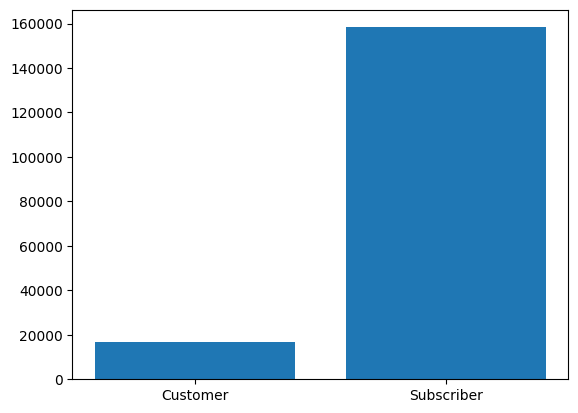

In [21]:
# Return the Series having unique values
x = bikeshare_df['user_type'].unique()

# Return the Series having frequency count of each unique value
y = bikeshare_df['user_type'].value_counts(sort=False)

# Dsiplay the plot
plt.bar(x, y)
plt.show();

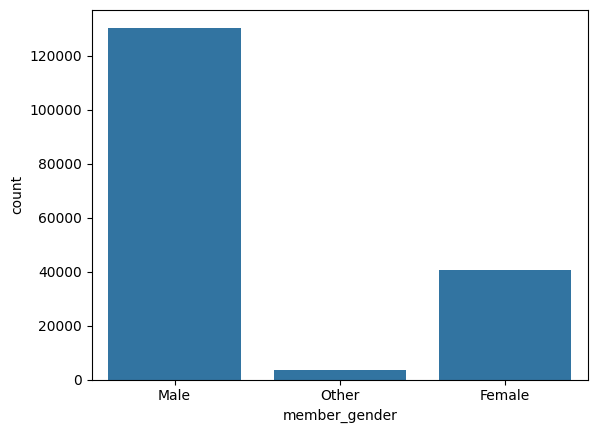

In [22]:
# Countplot for number of users by gender
sns.countplot(data=bikeshare_df, x='member_gender', color='tab:blue');

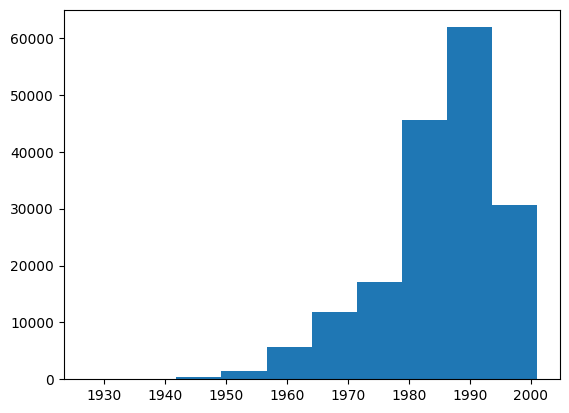

In [23]:
# Histogram for member birth years
plt.hist(data=bikeshare_df, x='member_birth_year', bins=10);

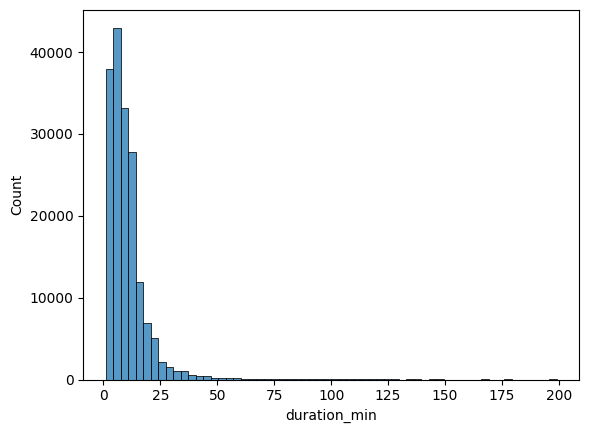

In [24]:
# Histogram for Trip Duration in minutes
sns.histplot(data=bikeshare_df[bikeshare_df['duration_min'] < 200], x='duration_min', bins=60);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable of interest as stated before was the user type. I used a count plot to look at the number of people for each user type. The results showed that there is significantly more subscriber users than customer users in this dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The first feature variable I investigated was the gender of the members. The results showed a lot more male users than female users. 
I then looked at the distrubtion of member birth years. It looked like the majority of the users were born in years between 1985 and 1995 roughly speaking.
Finally, I displayed the distribution of the trip duration in minutes. The results were heavily skewed to the left and I scaled the data down to 200 minutes for a more zoomed in look at the data. This was a big drop as originally the minutes went as high as 4000 minutes.

## Bivariate Exploration

>In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

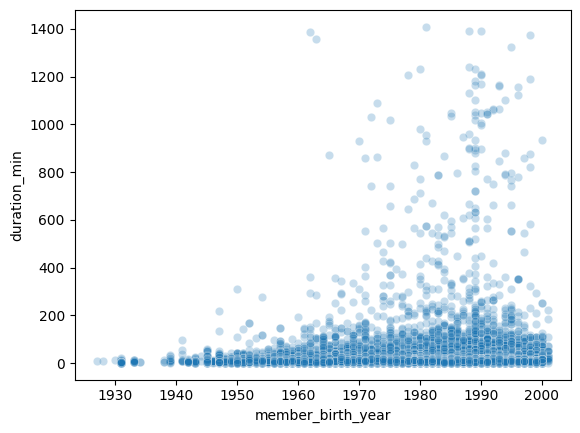

In [25]:
# Use scatterplot to explore correlation between birth year and trip duration
sns.scatterplot(data=bikeshare_df, x='member_birth_year', y='duration_min', alpha=0.25);

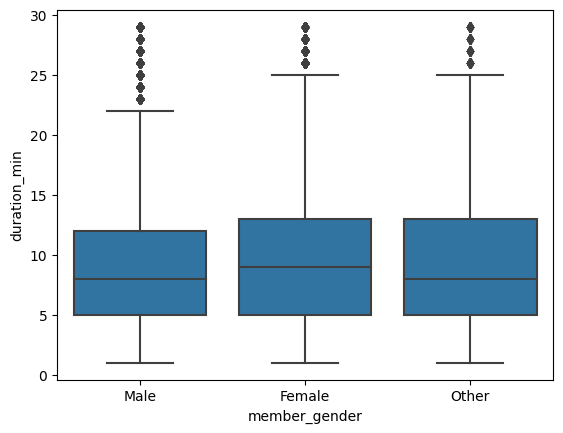

In [26]:
# Use boxplot to explore relationship between member gender and trip duration
# Crop data for a closer look at the percantile
sns.boxplot(data=bikeshare_df[bikeshare_df['duration_min'] < 30], x='member_gender', y='duration_min', color='tab:blue');

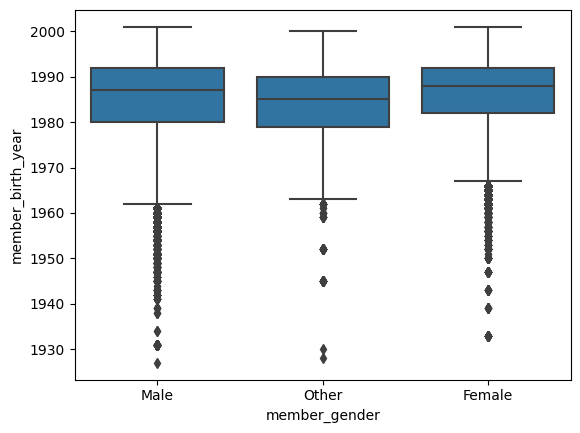

In [27]:
# Use boxplot to explore relationship between member gender and birth year 
sns.boxplot(data=bikeshare_df, x='member_gender', y='member_birth_year', color='tab:blue');

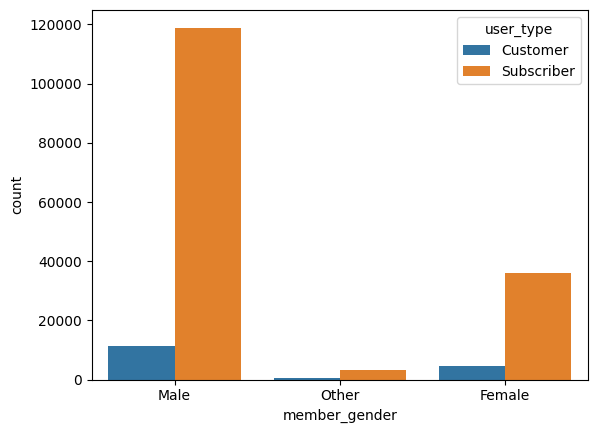

In [28]:
# Look at number of users by user type and gender
sns.countplot(data=bikeshare_df, x ='member_gender', hue='user_type');

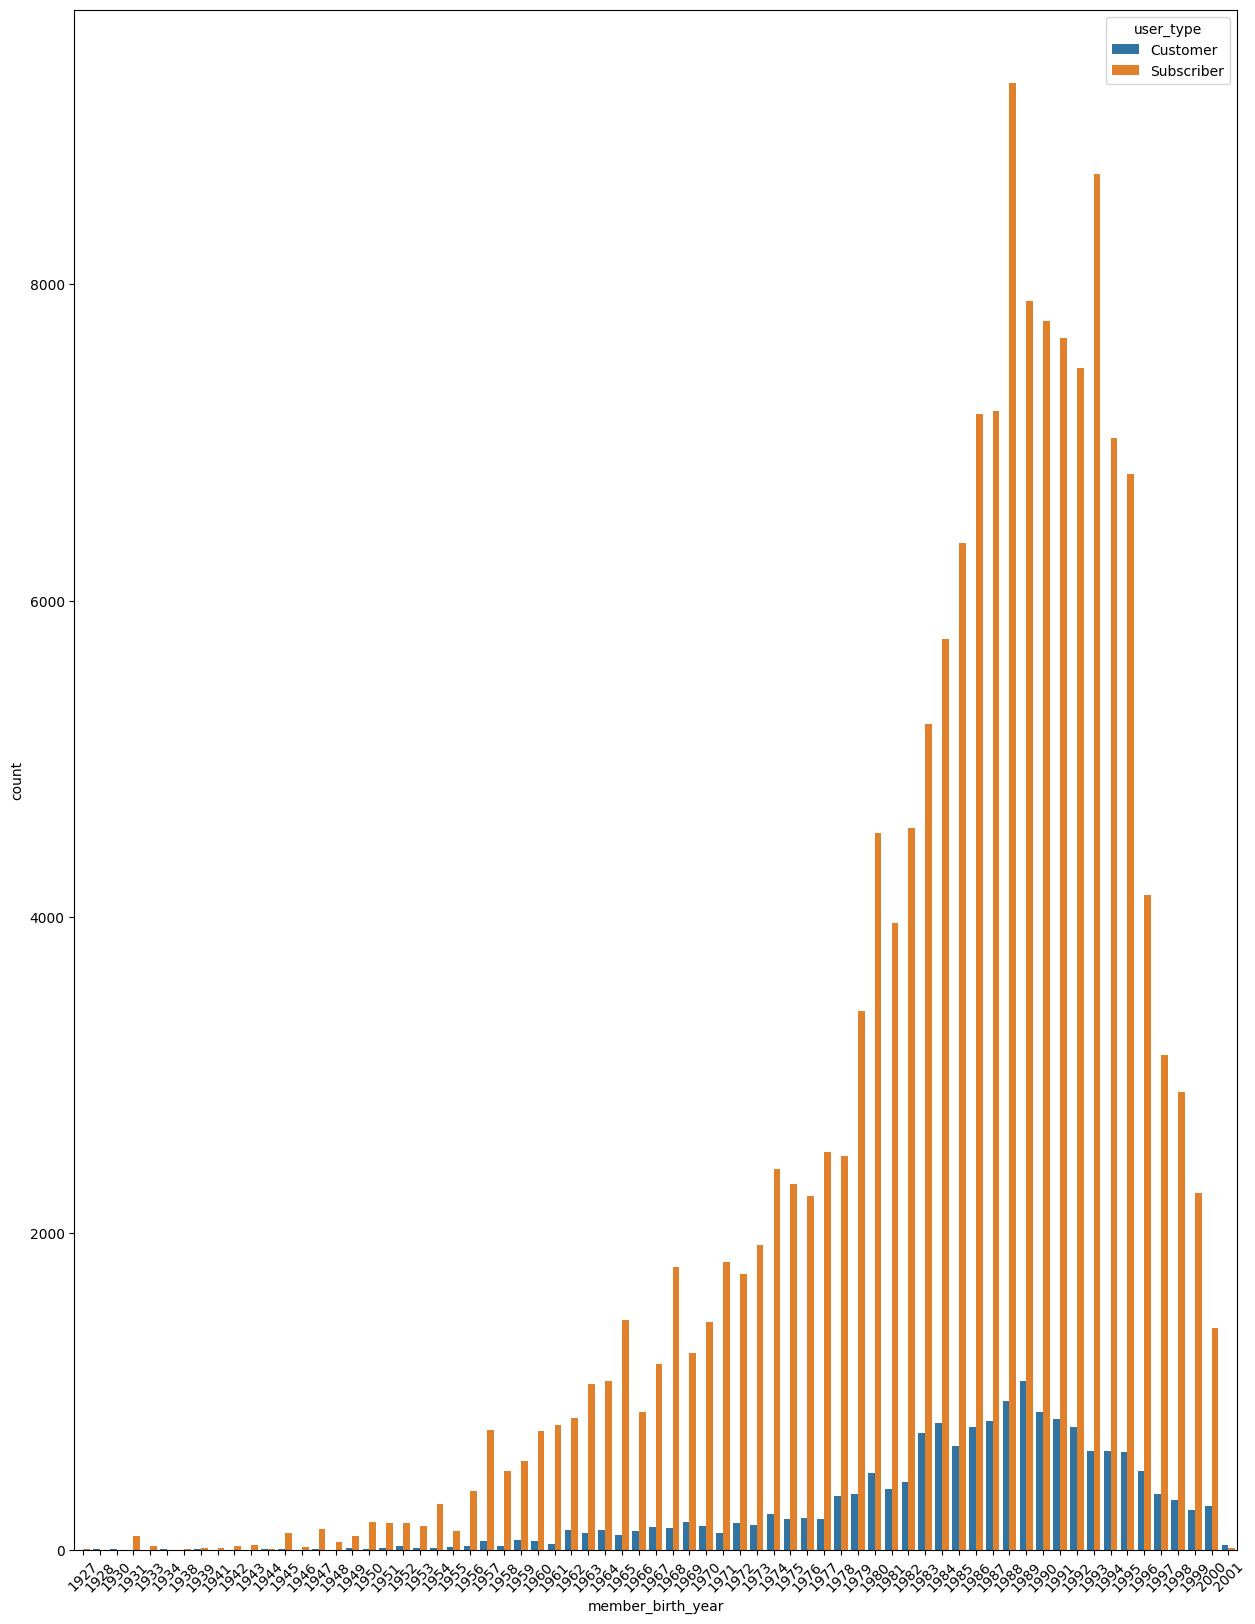

In [29]:
# Look at number of users by user type and birth year
plt.figure(figsize=[15,20])
sns.countplot(data=bikeshare_df, x ='member_birth_year', hue='user_type')
plt.xticks(rotation=45);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In the bivariate section, I looked at the user type in relation to the member gender and the member birth year. In both cases the number of users was greater for subscribers than customers across the board. We still see the same trend of male members compared to female, as well as the birth year being skewed to the right with the highest number of subscribers being born in 1988 while for customers it's 1989.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The first feature relationships I observed here was member birth year and duration in minutes. We see that trip duration are much longer for more younger member but most trips are under 200 minutes with a some outliers.
Next, I looked at how trip duration differs by member genders. I zoomed in to only include trips less than 30 minutes to focus on the percantiles of the boxplots. The results shows that trip durations for female are slighltly longer in the 75th and 50th percantile but equal in the 25th. Lastly, I wanted to know which gender was old and which was younger. The result are very close with males being slighlty older than females. Though males are much older in the outliers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

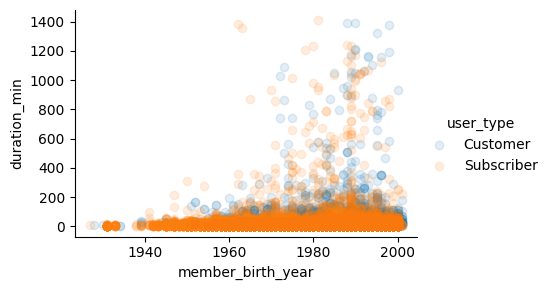

In [30]:
# Plot same scatterplot from bivariate section but use facetgrid to add hue of user type
ax = sns.FacetGrid(data=bikeshare_df, hue='user_type', aspect=1.5)
ax.map(sns.regplot,'member_birth_year','duration_min', scatter_kws={'alpha':0.125}, fit_reg=False);
ax.add_legend();

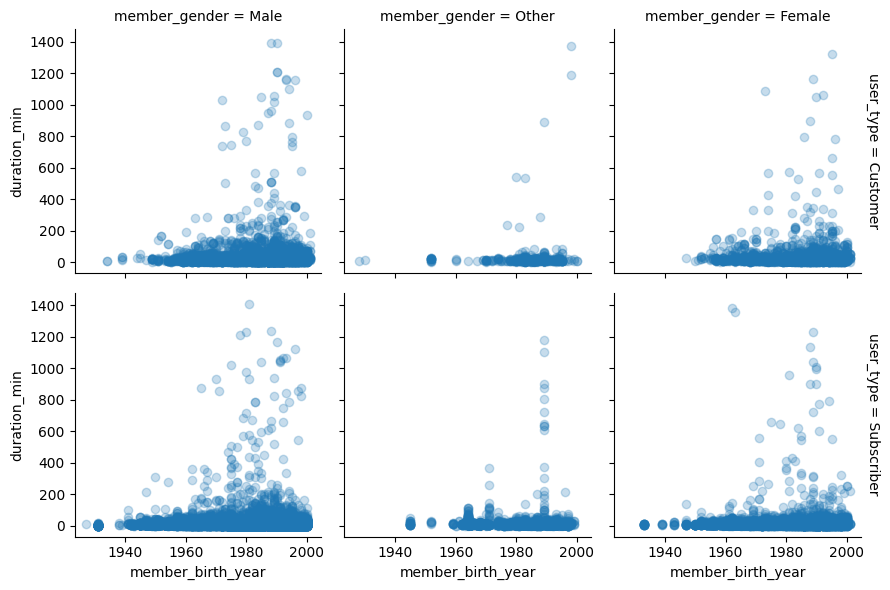

In [31]:
# Create row and column of scatterplot using facetgrid
# Member gender as column, user type as row
ax = sns.FacetGrid(data=bikeshare_df, col='member_gender', row='user_type', margin_titles=True)
ax.map(plt.scatter, 'member_birth_year','duration_min', alpha=0.25);

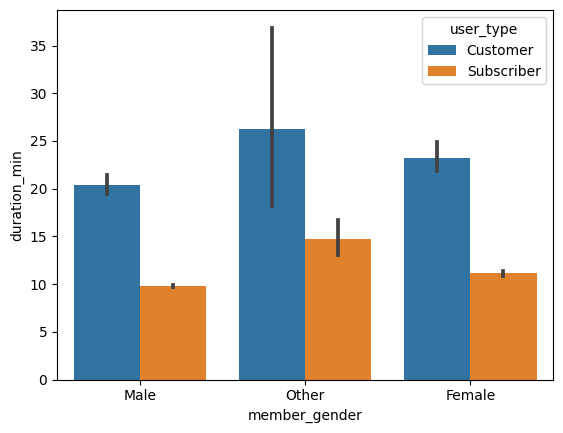

In [32]:
# Plot same barplot from bivariate section but add trip duration for y axis
sns.barplot(data=bikeshare_df, x ='member_gender', y ='duration_min', hue='user_type');

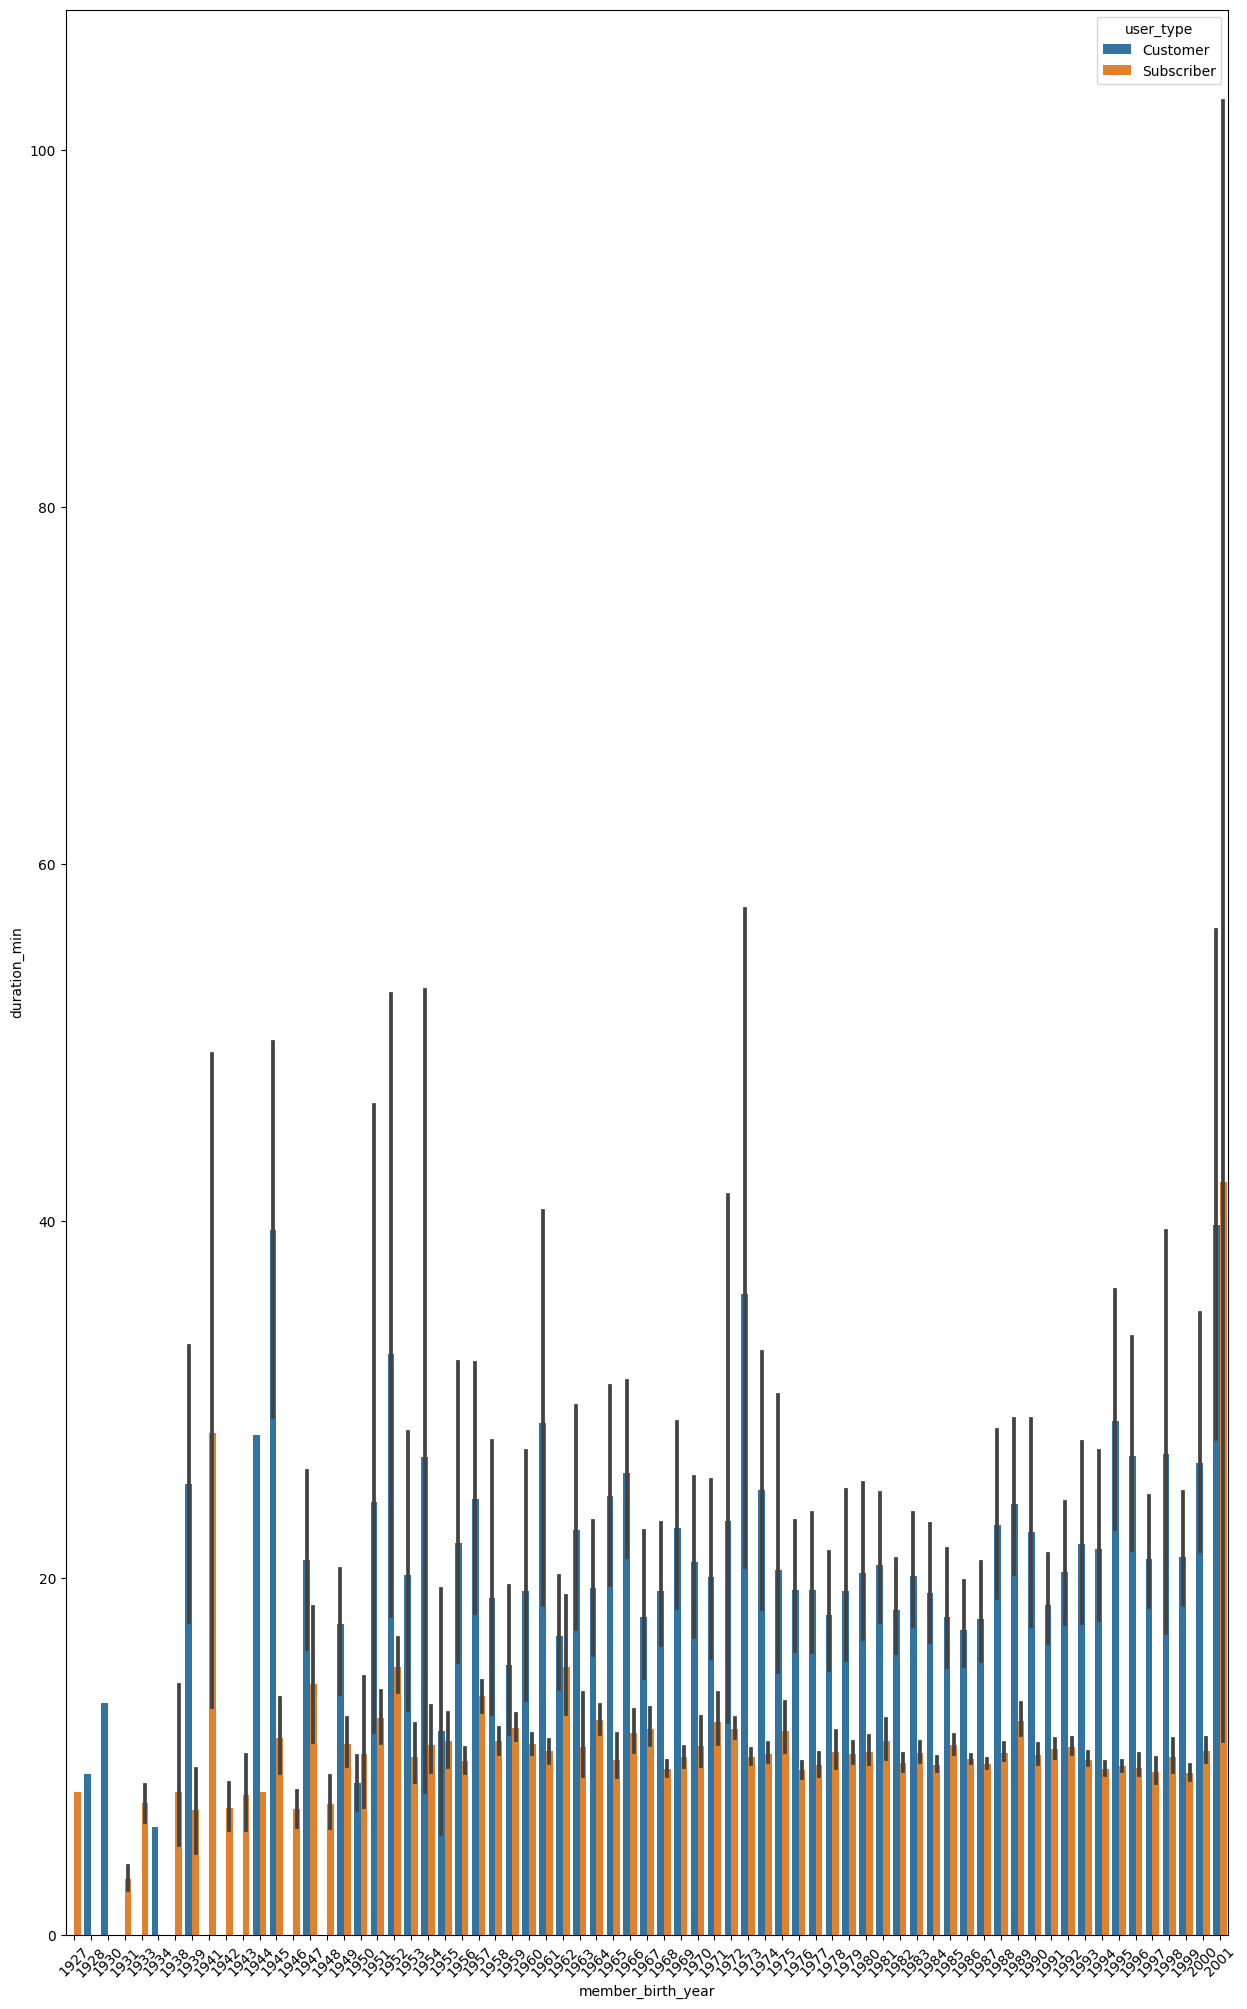

In [33]:
# Look at trip duration of different user types by birth year
plt.figure(figsize=[15,25])
sns.barplot(data=bikeshare_df, x ='member_birth_year', y ='duration_min', hue='user_type')
plt.xticks(rotation=45);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In these section of multivariate exploration, I investigated the user_type variable with 2 feature variable. In the first visual, I use a scatterplot to explore the correlation between trip duration and birth by the two different user types. The results shows a similar trend between subscribers and customers where in both, older users are in shorter trips, typically less than 200 minutes, whiles younger user have much longer trips.
In the next visual, I use a facetgrid plot with the same variables adding the member gender variable. This further explores the correlation of trip duration and birth year and how they differ among user type and user gender. In the last two visuals, clustered barcharts are used with trip duration as the y axis. In both cases for member birth year and gender, we can see that customers have longer trip durations with a few exceptions in the birth year variable.

### Were there any interesting or surprising interactions between features?

The most interesting and surprising discovery was seeing that customers had long trips for all genders, significantly longer than subscribers. This was also the case for birth year where customer users in most birth years had longer trip duration than subscribers. This was not very visible however in the scatterplots visuals.

## Conclusions

After using many different visualization methods for this exploratory analysis project, this are a some of the findings:
- There is significantly more subscribers than customers in this particulary dataset
- Likewise, there is way more male users than female and other
- The most common age for user is around 30-40 years
- The median birth year for male, female is roughly the same, 1986 or 87, while slightly lowere for other at 1985
- Most trip duration are under 25 minutes, with many outliers being made by the younger users
- Median trip duration is slightly shorter for males than females but similar to other
- When comparing trip duration by member birth year and member gender for the two user type, we see that customers complete longer trips compared to subscribers

Overall, from this visualizations we see some expected outcomes like most users being young adults or middle age and most trips lasting around 15 minutes. We all see unexpected results like their being more subscribers than customers as I assume subscribers means more of a commitment. Also the discrepancy between number of males and females or other is greater than would be expected. 